# DFT DATA PROCESSING AND VISUALIZATION NOTEBOOK


####Operio, Jericho Ross R.
####BS Chemistry Class of 2025
####Founding Member, VSU Theoretical and Computational Research Group

This Colab notebook provides the Python codes for processing and visualizing density-functional theory (DFT) data generated with Quantum ESPRESSO (QE). Its applications are limited to plotting structural, electronic, and mechanical properties. For running QE simulations using QE on Linux, please consult Mr. Jericho Ross R. Operio. For codes related to optical and thermoelectric property analysis, please consult Mr. Jude Eric R. Operio. For properties outside the scope previously mentioned, you are encouraged to find other sources, or much better, build your own and contribute to the development of these notebooks. Note that this notebook does not provide explanations of the underlying definitions or theoretical concepts, as it is intended for users who already possess, or at least have, a working knowledge of DFT and Quantum ESPRESSO. With that understanding, you are encouraged to use and explore this notebook to its fullest potential.

However, you may still use this notebook if you wish to learn how Python is applied in handling materials simulation data. All supporting files—such as the .dat and .gnu files—are included in the same folder as the notebook. If you’re new to Python, no worries! Simply follow the instructions and read the accompanying comments to help you understand the syntax. You may also consult AI tools to clarify what each line of code does—just remember to use them responsibly and ethically.

**REMINDERS:**

1. *Do not distribute this notebook without first informing the owner. Only authorized individuals are permitted to use it.*
2. *Do not work directly on this notebook: instead, create and save a personal copy in your Google Drive and use that copy for your work.*

###I. CONVERGENCE TESTING

In DFT calculations, the standard workflow begins with convergence testing to determine reliable values for the most fundamental parameters: the plane-wave cutoff energy (ecut) and the k-point (kp) grid/mesh. Establishing these ensures that all results are both accurate and computationally efficient. In this section, we present codes for plotting the ecut and kp dataset.

We begin by installing the required libraries for this notebook. Simply click "shift + enter", or press the arrow button on the upper-left corner of the next cell. When a check mark appears on the bracket beside the cell, it means the installations have been successfully executed. This same process applies to running all other code cells in the notebook. The time indicated beside the check mark tells you the runtime of the process. If you are running this notebook in an environment with pre-installed or built-in libraries, you will see a "Requirement satisfied..." text.

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

We then import these libraries. Once this step is completed, you will not need to re-import them for the remaining tasks.

In [2]:
import matplotlib.pyplot as plt # for plotting
import matplotlib.font_manager as font_manager # for font selection
from matplotlib.gridspec import GridSpec # when needed for crcrueating grids in combined plots
import numpy as np # for scientific computing
from scipy.optimize import curve_fit # for model fitting

Upload the .dat files containing the ecut values from your QE calculations. To do this, click the folder icon on the side panel and drag the files into the upload area. A warning prompt will appear—simply click OK. Keep in mind that the uploaded files are not stored permanently, so make sure not to delete your original copies, as you may need to re-upload them when necessary.

If you need to process more than one dataset using this code, simply create a new code cell and reuse the script. To do this, move your cursor to the bottom center of the current cell, where two options will appear: one for adding a text cell and one for adding a code cell. Select the code cell option, then copy the previous code into the new cell and edit it as needed for the new dataset.

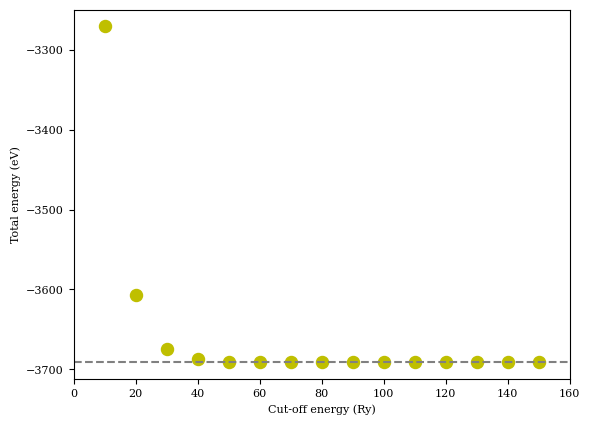

In [4]:
# Conversion factor from Rydberg to eV (the initial ecut values are in Ry: we convert first to eV for convention and also for consistency with QE results)
RY_TO_EV = 13.605693122994

# Load data
ecut, ener_ry = np.loadtxt('/content/CaAlN3-calc-ecut.dat', delimiter=None, unpack=True) # move the cursor to the file’s right side, click the three-dot icon, and select “Copy path.” Paste it inside the single quotes of this code line

# Convert energy from Ry to eV
ener_ev = ener_ry * RY_TO_EV

# Set font style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif' # nearest font available to Times New Roman
plt.rcParams['font.size'] = 8 # you can change this to your preferred size

# Create plot
plt.figure()
plt.scatter(ecut, ener_ev, s=75, color='y') # you can change "s" to your preferred point size, and "color" to your preferred color

# Draw horizontal line at final energy value (use last entry instead of fixed index)
plt.axhline(ener_ev[-1], color='gray', linestyle='--')

# Axis labels
plt.xlabel('Cut-off energy (Ry)') # title for the x-axis
plt.ylabel('Total energy (eV)') # title for the y-axis

# Set x-axis range
plt.xlim(0, 160) # change depending on the min and max of your ecut values; considering adding/subtracting a preferred value to the min and max so that the whole plot is drawn within

# Automatically set y-axis limits with padding
y_min = np.min(ener_ev)
y_max = np.max(ener_ev)
y_range = y_max - y_min
padding = 0.05 * y_range
plt.ylim(y_min - padding, y_max + padding)
# plt.savefig('plot-ecut.png', dpi=300) # change to preferred image filename; we use dpi=300 to produce HD images
# to save the image file, comment out the 'plt.savefig()' code line by removing the '#' sign before running the code
# to download the image, simply move your cursor to the right side of the image file, click the 3-dot menu, and select "download"
plt.show()

In this plot, no title is included because the notebook is generating thesis-ready images with specific formatting requirements. However, if you wish to add one, you can simply use plt.title("Your Title") along with the axis label commands.

Once a converged ecut value has been determined, use that value to generate the k-point (kp) dataset in QE. As with the previous step, upload the .dat file containing the kp values, then execute the corresponding code cell to process and visualize the results.

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-683321525.py:23: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Number of $\mathbf{k}$-points')


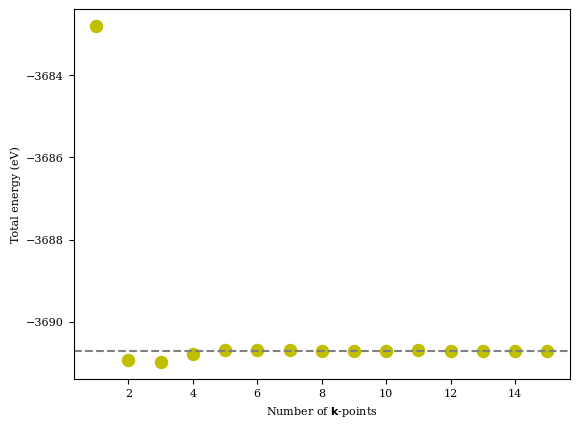

In [5]:
# Conversion factor from Rydberg to eV
RY_TO_EV = 13.605693122994

# Load the data and convert energy from Ry to eV
kp, ener_ry = np.loadtxt('/content/CaAlN3-calc-k.dat', delimiter=None, unpack=True)
ener_ev = ener_ry * RY_TO_EV

# Create figure object
plt.figure()

# Set font style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

# Plot the data
plt.scatter(kp, ener_ev, s=75, color='y')

# Plot a horizontal dashed line at the last energy value
plt.axhline(ener_ev[-1], color='gray', linestyle='--')

# Axis labels
plt.xlabel('Number of $\mathbf{k}$-points')
plt.ylabel('Total energy (eV)')

# Automatically set y-limits with padding
y_min = np.min(ener_ev)
y_max = np.max(ener_ev)
y_range = y_max - y_min
padding = 0.05 * y_range

plt.ylim(y_min - padding, y_max + padding)

# Automatically set x-limits with padding (optional)
x_min = np.min(kp)
x_max = np.max(kp)
x_range = x_max - x_min
x_padding = 0.05 * x_range
plt.xlim(x_min - x_padding, x_max + x_padding)
# plt.savefig('plot-kpoint.png', dpi=300)
plt.show()

As before, if you need to process multiple datasets, create a new code cell and reuse the script. After finding a converged kp value, use it together with the converged ecut value to perform structural calculations in Quantum ESPRESSO.

###II. STRUCTURAL PROPERTIES

In all DFT workflows, structural optimization serves as the first and most crucial step. Any errors here will propagate and compromise the reliability of subsequent calculations. Thus, it is vital to ensure that your QE structural optimizations are carried out with confidence, using the previously determined converged parameters.

Upload the .dat file that lists the lattice constants and total energies from your QE runs, then check that the lattice constant values include their decimal places. If the decimal portion is missing (e.g., 2.43 shows as 2), the issue is not the decimal point itself but how the values were written or parsed by your script. Common causes are integer-formatting, splitting the number on . with tools like cut, or using commands that truncate floats. If decimals are lost, either regenerate the .dat with proper floating-point formatting of your .sh file, or edit the file manually.

With that completed, run the code in the next cell to process the data.

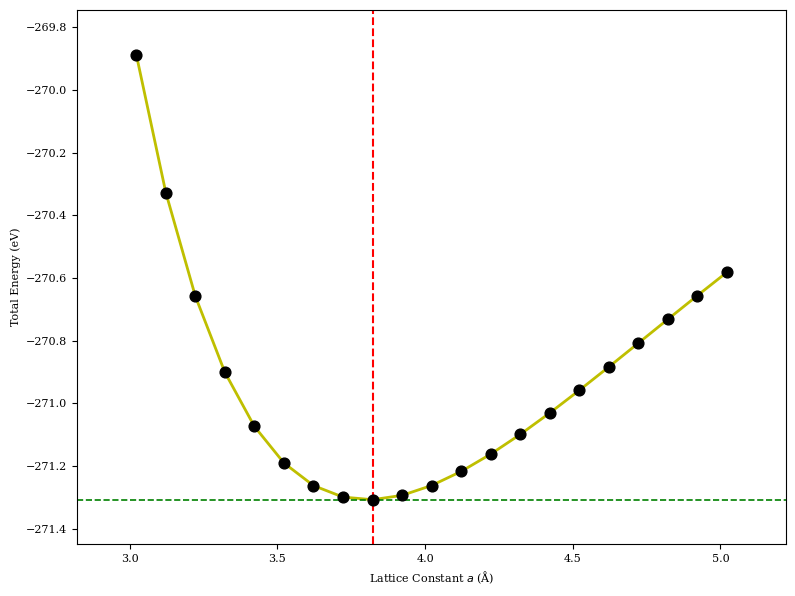

In [7]:
# Load lattice constant (Å) and total energy (eV) from file
a_lattice, energy = np.loadtxt('/content/CaAlN3-calc-alat.dat', delimiter=None, unpack=True)

# sort data for smooth curve plotting
sorted_indices = np.argsort(a_lattice)
a_lattice = a_lattice[sorted_indices]
energy = energy[sorted_indices]

# find minimum energy and corresponding lattice constant
min_index = np.argmin(energy)
a_min = a_lattice[min_index]
E_min = energy[min_index]

# Plot setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8
plt.figure(figsize=(8, 6))

# plot smooth curve and data points
plt.plot(a_lattice, energy, color='y', linewidth=2)
plt.scatter(a_lattice, energy, color='black', s=60, zorder=5)

# dashed lines for minimum energy and lattice constant
plt.axvline(a_min, color='red', linestyle='--', linewidth=1.5)
plt.axhline(E_min, color='green', linestyle='--', linewidth=1.2)

# labels and title
plt.xlabel('Lattice Constant $a$ (Å)')
plt.ylabel('Total Energy (eV)')

# set axis limits with margin
x_margin = 0.1 * (max(a_lattice) - min(a_lattice))
y_margin = 0.1 * (max(energy) - min(energy))
plt.xlim(min(a_lattice) - x_margin, max(a_lattice) + x_margin)
plt.ylim(min(energy) - y_margin, max(energy) + y_margin)

# final touches
plt.grid(False)
plt.tight_layout()
# plt.savefig('plot-lattice.png', dpi=300)
plt.show()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

At this point, you should have identified a suitable lattice constant for your material within ±0.1. For greater precision, you may fine-tune the value within ±0.01. Once that is done, you can plot the fine-tuned lattice constant dataset by running the code in the next cell.

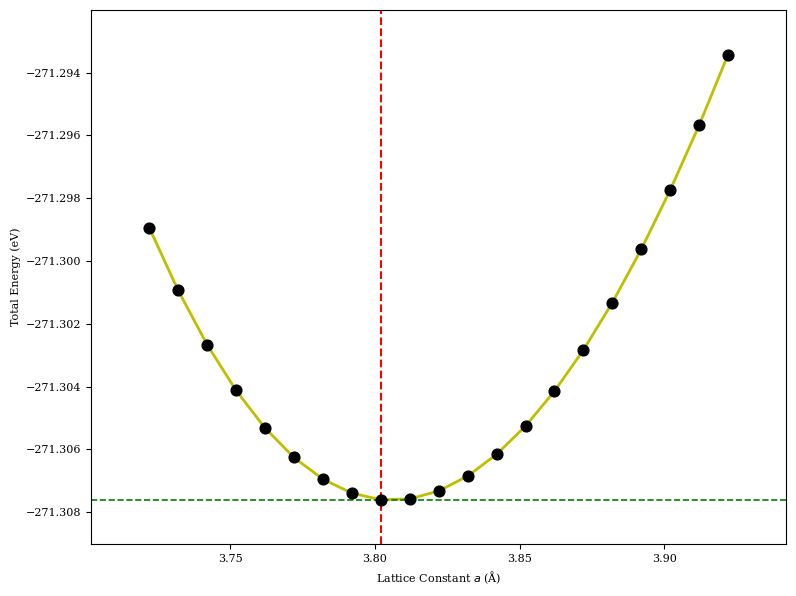

In [8]:
a_lattice, energy = np.loadtxt('/content/CaAlN3-calc-alat-ft.dat', delimiter=None, unpack=True)

sorted_indices = np.argsort(a_lattice)
a_lattice = a_lattice[sorted_indices]
energy = energy[sorted_indices]

min_index = np.argmin(energy)
a_min = a_lattice[min_index]
E_min = energy[min_index]

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8
plt.figure(figsize=(8, 6))
plt.plot(a_lattice, energy, color='y', linewidth=2)
plt.scatter(a_lattice, energy, color='black', s=60, zorder=5)
plt.axvline(a_min, color='red', linestyle='--', linewidth=1.5)
plt.axhline(E_min, color='green', linestyle='--', linewidth=1.2)
plt.xlabel('Lattice Constant $a$ (Å)')
plt.ylabel('Total Energy (eV)')
x_margin = 0.1 * (max(a_lattice) - min(a_lattice))
y_margin = 0.1 * (max(energy) - min(energy))
plt.xlim(min(a_lattice) - x_margin, max(a_lattice) + x_margin)
plt.ylim(min(energy) - y_margin, max(energy) + y_margin)
plt.grid(False)
plt.tight_layout()
# plt.savefig('plot-lattice-ft.png', dpi=300)
plt.show()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

Alternatively, for purposes such as preparing a manuscript, it is often preferable to present the results in a single combined plot. If you prefer this style, you may use the following code. If not, you can stick with the separate images you have previously generated.

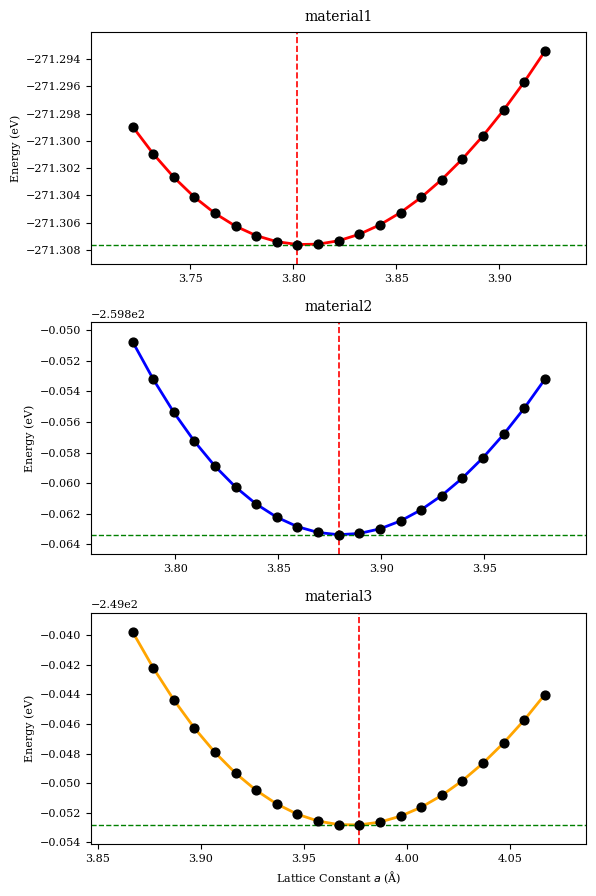

In [9]:
# File paths and colors for each material
files = [
    ('material1', '/content/CaAlN3-calc-alat-ft.dat', 'red'), # the "material1" serves as a placeholder for the name of your material; you can change that to your material name should you prefer to do so
    ('material2', '/content/SrAlN3-calc-alat-ft.dat', 'blue'), # sample name: XAlN₃; copy the subscript to the material name to reflect a subscript in the labeling
    ('material3', '/content/BaAlN3-calc-alat-ft.dat', 'orange') # in this code, only 3 materials are being plotted; if you have more than 3, just copy any of these 3 code lines and paste below; make sure that all of your code lines in this part are within the []
]

# setup font globally
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

# create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9), sharex=False) # in this code, only 3 materials are being plotted; if you have more than 3, just change the value of nrows to the number of your material

for ax, (label, file_path, color) in zip(axes, files):
    # load and sort data
    a_lattice, energy = np.loadtxt(file_path, unpack=True)
    sorted_indices = np.argsort(a_lattice)
    a_lattice = a_lattice[sorted_indices]
    energy = energy[sorted_indices]

    # find minimum energy
    min_index = np.argmin(energy)
    a_min = a_lattice[min_index]
    E_min = energy[min_index]

    # plot
    ax.plot(a_lattice, energy, color=color, linewidth=2, label=f'{label}')
    ax.scatter(a_lattice, energy, color='black', s=40, zorder=5)
    ax.axvline(a_min, color='red', linestyle='--', linewidth=1.2)
    ax.axhline(E_min, color='green', linestyle='--', linewidth=1)

    # axis labeling
    ax.set_ylabel('Energy (eV)')
    ax.set_title(f'{label}', fontsize=10, pad=8)

    # axis limits with margins
    x_margin = 0.1 * (max(a_lattice) - min(a_lattice))
    y_margin = 0.1 * (max(energy) - min(energy))
    ax.set_xlim(min(a_lattice) - x_margin, max(a_lattice) + x_margin)
    ax.set_ylim(min(energy) - y_margin, max(energy) + y_margin)

    ax.grid(False)

# shared x-axis label
axes[-1].set_xlabel('Lattice Constant $a$ (Å)')

plt.tight_layout(h_pad=1.5)
# plt.savefig('Lattice-Constants-combined.png', dpi=300)
plt.show()

In essence, the plotting of lattice constants concludes at this point, and by then you will have determined a suitable value for your material. However, some researchers prefer to further validate their results by comparing the lattice constants against an established model, especially when no prior studies are available for reference. A widely used approach is the semi-empirical third-order Birch–Murnaghan equation of state, which relates the material’s volume (for a cubic unit cell, the cube of the lattice constant) to its total energy. By fitting the calculated lattice constants into this model, the equilibrium lattice constant can be extracted. To perform this validation, run the following code:

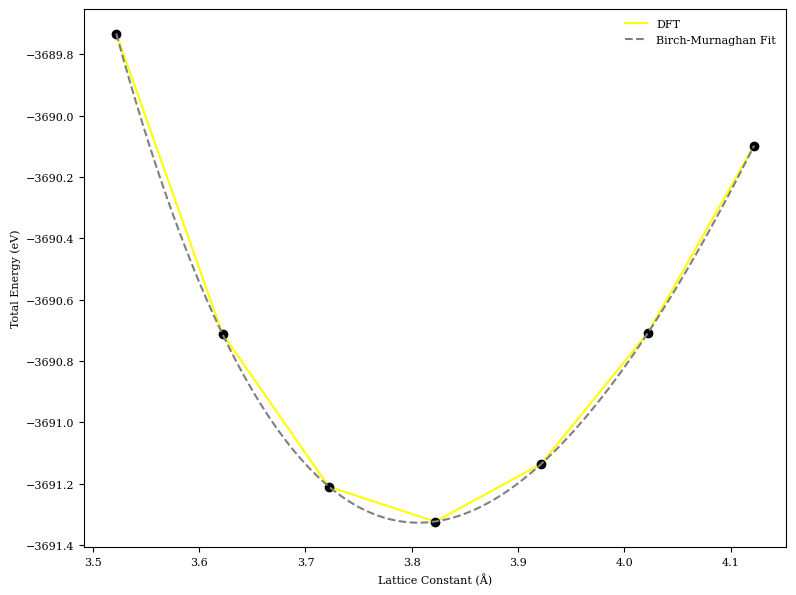

Equilibrium energy E₀ = -3691.327674 eV
Equilibrium lattice constant a₀ = 3.805945 Å
Bulk modulus B₀ = 0.913370 eV/Å³ ≈ 146.34 GPa
Pressure derivative B₀′ = 4.018


In [10]:
# Conversion factor: Rydberg to eV
RY_TO_EV = 13.605693122994

# Birch-Murnaghan EoS
def birch_murnaghan(a, E0, a0, B0, B0_prime):
    V0 = a0**3
    ratio_sq = (a0 / a)**2
    delta = ratio_sq - 1
    term1 = (9 * V0 * B0 / 16)
    return E0 + term1 * (delta**3 * B0_prime + delta**2 * (6 - 4 * ratio_sq))

# load data
data = np.loadtxt('/content/CaAlN3-calc-alat.dat')
a_all = data[:, 0]
E_all = data[:, 1] * RY_TO_EV  # Convert to eV

# select 7 points around the minimum
min_idx = np.argmin(E_all)
start = max(min_idx - 3, 0)
end = min(min_idx + 4, len(E_all))
a_data = a_all[start:end]
E_data = E_all[start:end]

# data fitting
initial_guess = [min(E_data), a_data[np.argmin(E_data)], 0.5, 4.0]
params, _ = curve_fit(birch_murnaghan, a_data, E_data, p0=initial_guess)
E0, a0, B0, B0_prime = params
B0_GPa = B0 * 160.21766208

# smooth fit curve
a_fit = np.linspace(min(a_data), max(a_data), 400)
E_fit = birch_murnaghan(a_fit, *params)

# plot
plt.figure(figsize=(8,6))
# plot the DFT line (yellow) and individual points (black)
plt.plot(a_data, E_data, '-', color='yellow', label='DFT')  # Line through DFT points
plt.plot(a_data, E_data, 'o', color='black')  # Individual points

# plot the Birch-Murnaghan fit (gray)
plt.plot(a_fit, E_fit, '--', color='gray', label='Birch-Murnaghan Fit')

plt.xlabel('Lattice Constant (Å)')
plt.ylabel('Total Energy (eV)')
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig("BMEoS.png", dpi=300)
plt.show()

# Output: This gives you a printed value of the following which you can copy for your manuscript
print(f'Equilibrium energy E₀ = {E0:.6f} eV')
print(f'Equilibrium lattice constant a₀ = {a0:.6f} Å')
print(f'Bulk modulus B₀ = {B0:.6f} eV/Å³ ≈ {B0_GPa:.2f} GPa')
print(f'Pressure derivative B₀′ = {B0_prime:.3f}')

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

Alternatively, for purposes such as preparing a manuscript, it is often preferable to present the results in a single combined plot. If you prefer this style, you may use the following code. If not, you can stick with the separate images you have previously generated.

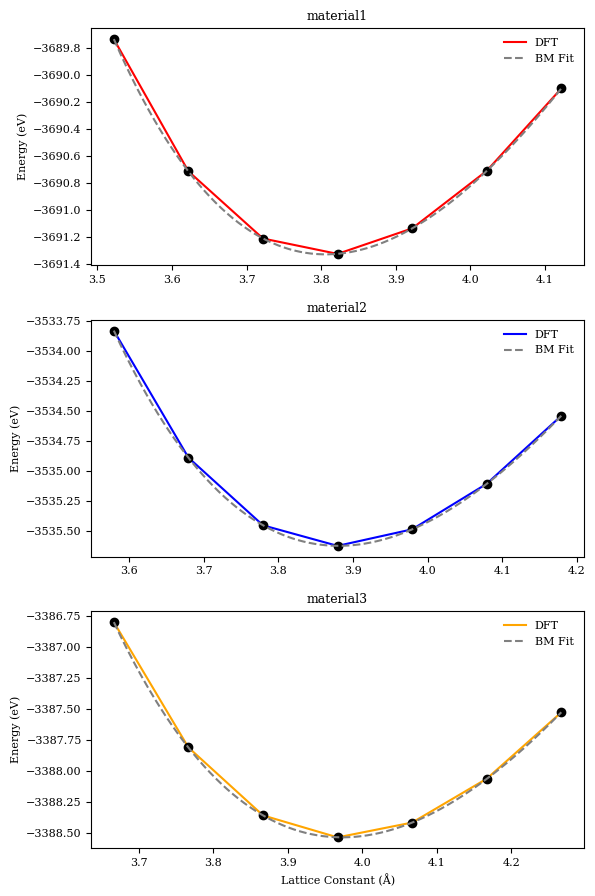

In [11]:
RY_TO_EV = 13.605693122994

# Birch-Murnaghan EoS
def birch_murnaghan(a, E0, a0, B0, B0_prime):
    V0 = a0**3
    ratio_sq = (a0 / a)**2
    delta = ratio_sq - 1
    term1 = (9 * V0 * B0 / 16)
    return E0 + term1 * (delta**3 * B0_prime + delta**2 * (6 - 4 * ratio_sq))

# compound info: label, file, color
compounds = [
    ("material1", "/content/CaAlN3-calc-alat.dat", "red"), # as with earlier, you can change to your material name
    ("material2", "/content/SrAlN3-calc-alat.dat", "blue"),
    ("material3", "/content/BaAlN3-calc-alat.dat", "orange") # as with earlier, you can add more code lines to match the number of your material
]

# plot setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 9), sharex=False) # as with earlier, you can change nrow to match the number of your material

# loop through each compound
for ax, (label, file_path, color) in zip(axes, compounds):
    data = np.loadtxt(file_path)
    a_all = data[:, 0]
    E_all = data[:, 1] * RY_TO_EV  # Convert Rydberg to eV

    # select 7 points around minimum
    min_idx = np.argmin(E_all)
    start = max(min_idx - 3, 0)
    end = min(min_idx + 4, len(E_all))
    a_data = a_all[start:end]
    E_data = E_all[start:end]

    # fit BM EoS
    initial_guess = [min(E_data), a_data[np.argmin(E_data)], 0.5, 4.0]
    params, _ = curve_fit(birch_murnaghan, a_data, E_data, p0=initial_guess)
    E0, a0, B0, B0_prime = params
    B0_GPa = B0 * 160.21766208

    # generate smooth fitted curve
    a_fit = np.linspace(min(a_data), max(a_data), 400)
    E_fit = birch_murnaghan(a_fit, *params)

    # plot DFT data and fit
    ax.plot(a_data, E_data, '-', color=color, label='DFT')
    ax.plot(a_data, E_data, 'o', color='black')
    ax.plot(a_fit, E_fit, '--', color='gray', label='BM Fit')

    # annotate with compound label and parameters
    ax.set_ylabel('Energy (eV)')
    ax.set_title(f"{label}", fontsize=9)
    ax.grid(False)
    ax.legend(frameon=False, loc='best')

# shared X-axis label
axes[-1].set_xlabel('Lattice Constant (Å)')

# layout adjustment
plt.tight_layout(h_pad=1.5)
# plt.savefig("BMEoS-combined.png", dpi=300)
plt.show()

Congratulations! You have successfully completed the plotting of your structural properties data.

### III. ELECTRONIC PROPERTIES

From your earlier DFT calculations, you have already determined an appropriate lattice constant. Using this value along with your converged ecut and kp, you can now proceed to calculate the electronic properties of your material. While many electronic properties can be explored, this notebook will only focus on plotting the following:
*   Band structure (spin-polarized and non–spin-polarized)
*   Density of states (DOS) (spin-polarized and non–spin-polarized)
*   Partial density of states (PDOS) (both atom-resolved and orbital-resolved)

####III.a. BAND STRUCTURE

###### NON-SPIN-POLARIZED BAND STRUCTURE

In QE, the band structure energies are stored in a .gnu file. For this step, locate the corresponding .gnu file from your calculations, upload it into this notebook, and then execute the code in the next cell.

<>:32: SyntaxWarning: invalid escape sequence '\G'
<>:32: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-745405488.py:32: SyntaxWarning: invalid escape sequence '\G'
  plt.xticks ([X, R1, M, gG, R2], ['X', 'R', 'M', '$\Gamma$', 'R']) # the first interval lists the k-point values for the code, thus, designate again with numbers to distinguish similar k-points; the second interval adds the label, no need to designate numbers and differentiate similar k-points


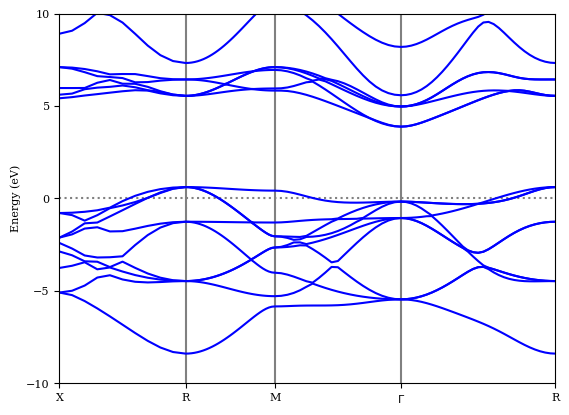

In [12]:
efermi = 10.0810 # when you ran your band structure calculations, you typically did a SCF and a NSCF calculations prior to the "bands" calculations; from your nscf.out, locate the Fermi energy and paste it here

# Load band data
data = np.loadtxt('/content/gr.bands.CaAlN3.gnu')

# Extract k-points and reshape energy values
k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

# Define high symmetry points
X = k[0]; R1 = k[10]; M = k[40]; gG = k[60]; R2 = k[90] # from your "bands" calculations, you specified the k-path; list them here in order, then from their k-point weights, add them up step-by-step as you trace the path, starting from 0
# for example, if you have a U-X-R k-path with weights U = 20, X = 10, R = 0, then U = k[0]; X = k[20,]; R = k[30]; the last k-point weight does not matter and is not considered
# if two k-points are the same, designate using numbers; e.g., X1, X2, ...

# Plot band structure
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.figure ()
plt.axhline (0, c='gray', ls=':')
plt.axvline(R1, c='gray') # here, we plot axes lines per k-point; considering that the terminal k-points will be plotted in the next code lines (plt.xlim()), you only need to specify here the in-between k-points
plt.axvline(M, c='gray') # for example, if you have a U-X-R k-path, only put the X here, such that, plt.axvline(X, c='gray'); delete the other lines or add other lines if necessary
plt.axvline(gG, c='gray')

for band in range(len(bands)):
 plt.plot(k, bands[band, :]-efermi , c='b')

plt.xlabel('')
plt.ylabel('Energy (eV)')
plt.xlim(X, R2) # list the terminal k-points in your k-path; for example, if you have a U-X-R k-path, then plt.xlim(U, R)
plt.ylim (-10, 10) # list a suitable energy interval for your band structure in such a way that you can fit an appropriate structure in your plot; you can play around the values here
plt.yticks(np.arange(-10, 11, 5))  # Set y-ticks every 5 eV
plt.xticks ([X, R1, M, gG, R2], ['X', 'R', 'M', '$\Gamma$', 'R']) # the first interval lists the k-point values for the code, thus, designate again with numbers to distinguish similar k-points; the second interval adds the label, no need to designate numbers and differentiate similar k-points
plt.tick_params(axis='x', which='minor', bottom=False, top=False)

# plt.savefig('nsp-bands.png', dpi=300)
plt.show ()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

SPIN-POLARIZED BAND STRUCTURE

For a spin-polarized band structure, you will need two .gnu files: one corresponding to the spin-up state and another for the spin-down state. Upload both files into this notebook. After that, the procedure is the same as for the non–spin-polarized band structure.

<>:38: SyntaxWarning: invalid escape sequence '\G'
<>:38: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-2108575984.py:38: SyntaxWarning: invalid escape sequence '\G'
  plt.xticks([X, R1, M, gG, R2], ['X', 'R', 'M', '$\Gamma$', 'R'])


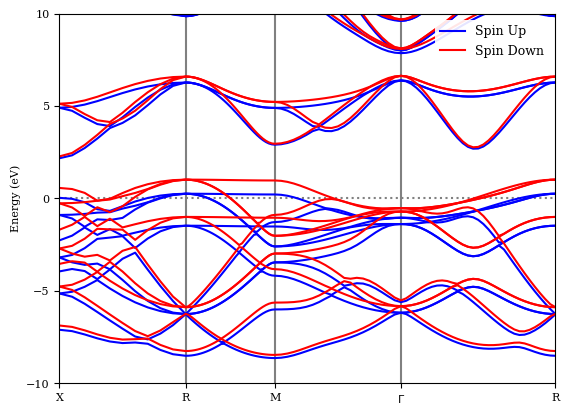

In [28]:
efermi = 10.0810

# Load spin-polarized band data
data_up = np.loadtxt('/content/gr.bands.CaAlN3.sp1.gnu')
data_down = np.loadtxt('/content/gr.bands.CaAlN3.sp2.gnu')

# Extract k-points and reshape energy values
k = np.unique(data_up[:, 0])
bands_up = np.reshape(data_up[:, 1], (-1, len(k)))
bands_down = np.reshape(data_down[:, 1], (-1, len(k)))

# Define high symmetry points
X = k[0]; R1 = k[10]; M = k[40]; gG = k[60]; R2 = k[90]

# Plot spin-polarized band structure
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8
plt.figure()
plt.axhline(0, c='gray', ls=':')
plt.axvline(R1, c='gray')
plt.axvline(M, c='gray')
plt.axvline(gG, c='gray')

# Plot spin-up bands in blue
for band in range(len(bands_up)):
    plt.plot(k, bands_up[band, :] - efermi, c='b', label='Spin Up' if band == 0 else "")

# Plot spin-down bands in red
for band in range(len(bands_down)):
    plt.plot(k, bands_down[band, :] - efermi, c='r', label='Spin Down' if band == 0 else "")

plt.xlabel('')
plt.ylabel('Energy (eV)')
plt.xlim(X, R2)
plt.ylim(-10, 10)
plt.yticks(np.arange(-10, 11, 5))  # Set y-ticks every 5 eV
plt.xticks([X, R1, M, gG, R2], ['X', 'R', 'M', '$\Gamma$', 'R'])
plt.tick_params(axis='x', which='minor', bottom=False, top=False)
legend = plt.legend(loc='upper right', fontsize=9, frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)  # Transparency simulating blur
legend.get_frame().set_edgecolor('none')

# plt.savefig('sp-bands.png', dpi=300)
plt.show()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

#### III.b. DENSITY OF STATES

##### NON-SPIN POLARIZED DENSITY OF STATES

In QE, the DOS energies are stored in a .dat file. For this step, locate the corresponding .dat file from your calculations, upload it into this notebook, and then execute the code in the next cell.

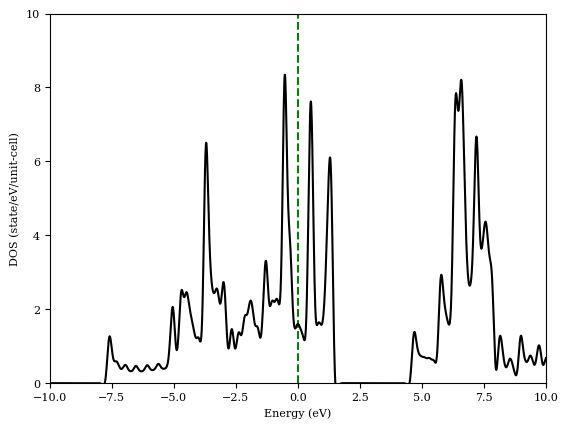

In [29]:
efermi = 9.3273 # change to your specifics
# Load the data
ener, dos, idos = np.loadtxt('/content/CaAlN3.dos.dat', unpack=True)

# Shift energy so Fermi level is at 0 eV
ener_shifted = ener - efermi

# Plotting setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.figure()

# Add a vertical line at the Fermi energy
plt.axvline(x=0, color='g', linestyle='--', label='Fermi Energy')

# Add labels and title
plt.plot(ener-efermi, dos, c='k')
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (state/eV/unit-cell)')
plt.xlim(-10, 10)
plt.ylim(0, 10)

# Save and show the plot
# plt.savefig('nsp-DOS.png', dpi=300)
plt.show()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

SPIN-POLARIZED DENSITY OF STATES

For a spin-polarized DOS, you will need the .dat file containing the spin-polarized energies. Upload the file into this notebook. After that, the procedure is the same as for the non–spin-polarized DOS.

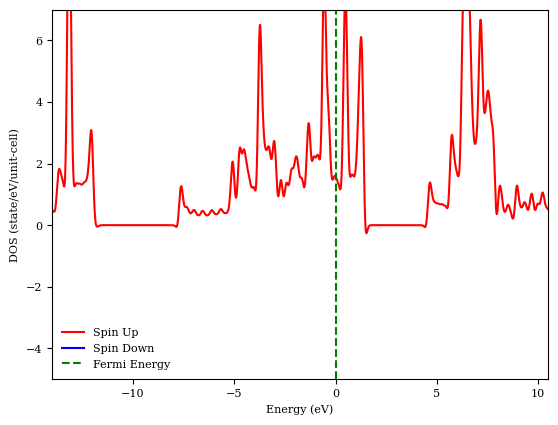

In [30]:
# Load the data
data = np.loadtxt('/content/CaAlN3.dos.dat')
ener = data[:, 0]
dosup = data[:, 1]
dosdw = data[:, 2]
dosdw_inverted = -dosdw
efermi = 9.3620  # Fermi energy

# Shift energy so Fermi level is at 0 eV
ener_shifted = ener - efermi

# Plotting setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8
plt.figure()

# Plot the spin-up DOS
plt.plot(ener_shifted, dosup, c='r', label='Spin Up')

# Plot the spin-down DOS
plt.plot(ener_shifted, dosdw_inverted, c='b', label='Spin Down')

# Add a vertical line at the Fermi energy (now zero)
plt.axvline(x=0, color='g', linestyle='--', label='Fermi Energy')

# Add labels and title
plt.xlabel('Energy (eV)')
plt.ylabel('DOS (state/eV/unit-cell)')
plt.xlim(-14, 10.5)  # Adjust x-axis limits accordingly
plt.ylim(-5, 7)  # Set y-axis limits based on data
plt.legend(frameon=False)  # Add a legend

# Save and show the plot
# plt.savefig('sp-dos.png', dpi=300)
plt.show()

Unfortunately, the file does not include spin-polarized data, so it only displays a single plot based on the non-spin-polarized results. To see an example of how the plot should appear, refer to the files in the same folder as this notebook. For your own work, make sure to run the spin-polarized calculations and then use your generated sp.dat file for this section.

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

Alternatively, for purposes such as preparing a manuscript, it is often preferable to present the results in a single combined plot. If you prefer this style, you may use the following code. If not, you can stick with the separate images you have previously generated.

In [ ]:
# File names and Fermi energies
files = [
    ('/content/material1.dos.dat', 8.3261, 'material1'), # change to appropriate material names and their corresponding Fermi energies
    ('/content/material2.dos.dat', 8.7975, 'material2'), # feel free to add or subtract code lines depending on your needs
    ('/content/material3.dos.dat', 9.3620, 'material3')
]

# Plotting setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 7), sharex=True) # feel free to change the value of nrows depending on your needs

for i, (ax, (filename, efermi, label)) in enumerate(zip(axes, files)):
    data = np.loadtxt(filename)
    ener = data[:, 0]
    dosup = data[:, 1]
    dosdw = data[:, 2]
    dosdw_inverted = -dosdw
    ener_shifted = ener - efermi

    ax.plot(ener_shifted, dosup, c='r', label='Spin Up')
    ax.plot(ener_shifted, dosdw_inverted, c='b', label='Spin Down')
    ax.axvline(x=0, color='g', linestyle='--')  # Fermi level line without legend entry
    ax.set_ylabel('DOS (states/eV)')
    ax.set_xlim(-14, 10.5)
    ax.set_ylim(-5, 7)
    ax.set_title(label)
    ax.legend(frameon=False, loc='upper right')

    # Add Ef label only in the top subplot
    if i == 0:
        ax.text(0.2, 6.2, '$E_f$', color='g', fontsize=9)

axes[-1].set_xlabel('Energy (eV)')

plt.tight_layout()
# plt.savefig('Stacked-SPDOS.png', dpi=300)
plt.show()

III.c. PARTIAL/PROJECTED DENSITY OF STATES

The main distinction between the density of states (DOS) and the partial density of states (PDOS) is that the PDOS deconstructs the total DOS to show the contributions from individual atoms or specific orbitals. While this might seem similar to a spin-polarized DOS—since both are forms of DOS decomposition—they differ in focus: the spin-polarized DOS separates contributions by spin channels (up and down), whereas the PDOS highlights how particular atoms or orbitals contribute to the overall electronic structure.

ATOM-RESOLVED PDOS

The atom-resolved PDOS illustrates the contribution of each atom within the material to the total DOS. To generate this plot, you will need two types of files: the .dat.pdos_tot file, which contains the total DOS, and the .dat.pdos_atm# files, which contain the PDOS for each individual atom. Once these files are uploaded into the notebook, you can run the code in the next cell to produce the plots.

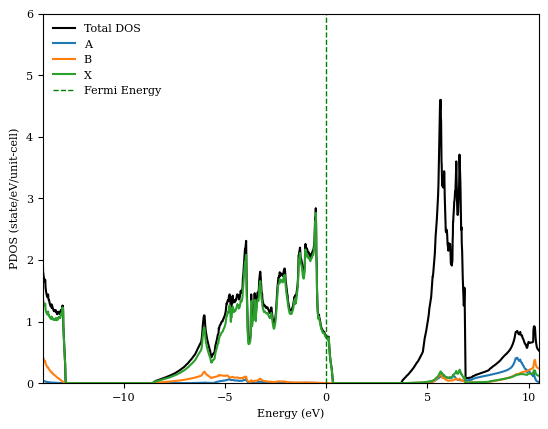

In [16]:
efermi = 9.3620 # change to your specifics

# Define the function to read the data file
def r_dos(name):
    ener, dos = np.loadtxt(name, usecols=(0, 1), unpack=True)
    return ener, dos

# Read the total PDOS of ABX₃
ener, dos = r_dos('/content/CaAlN3.pdos.dat.pdos_tot') # change to appropriate file name

# Read the PDOS of A atom number 1
ener1, p1A1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#1(s)') # change to appropriate file name; you can rename the variable "p1A1s" to reflect the name of the specific atom
_,     p1A2s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#3(s)') # for example, you can write "p1Ba1s" instead of "p1A1s", if your material is BaAlN₃; only change the "A" part
_,     p1A2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#2(p)')

# Read the PDOS of B atom number 2
ener2, p2B1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)') # refer to the instructions above
_,     p2B2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')

# Read the PDOS of X atoms 3, 4, and 5
ener3, p3X1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
_,     p3X2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')

ener4, p4X1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
_,     p4X2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')

ener5, p5X1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
_,     p5X2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')
# feel free to add or subtract code lines depending on your needs

# Atom-resolved PDOS: sum s + p for each atom
pA = p1A1s + p1A2s + p1A2p # e.g. PBa = p1Ba1s + p1Ba2s + p1Ba2p
pB = p2B1s + p2B2p
pX_total = (p3X1s + p3X2p +
            p4X1s + p4X2p +
            p5X1s + p5X2p)

# Plotting
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

plt.figure()

# Total DOS
plt.plot(ener - efermi, dos, c='k', label='Total DOS')

# Atom-resolved PDOS
plt.plot(ener1 - efermi, pA, label='A') # change the label to your appropriate atoms
plt.plot(ener2 - efermi, pB, label='B')
plt.plot(ener3 - efermi, pX_total, label='X')

# Labels and axis settings
plt.xlabel('Energy (eV)')
plt.ylabel('PDOS (state/eV/unit-cell)')
plt.axvline(x=0, color='g', linestyle='--', linewidth=1, label='Fermi Energy')
plt.xlim(-14, 10.5)
plt.ylim(0, 6)

# Add a legend
plt.legend(frameon=False)

# Show the figure
# plt.savefig('ar-pdos.png', dpi=300)
plt.show()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

Alternatively, for purposes such as preparing a manuscript, it is often preferable to present the results in a single combined plot. If you prefer this style, you may use the following code. If not, you can stick with the separate images you have previously generated. Rename the material names, file paths, and variable labels to match the convention we used earlier. You may also add or remove code lines depending on the number of atoms or orbitals in your system.

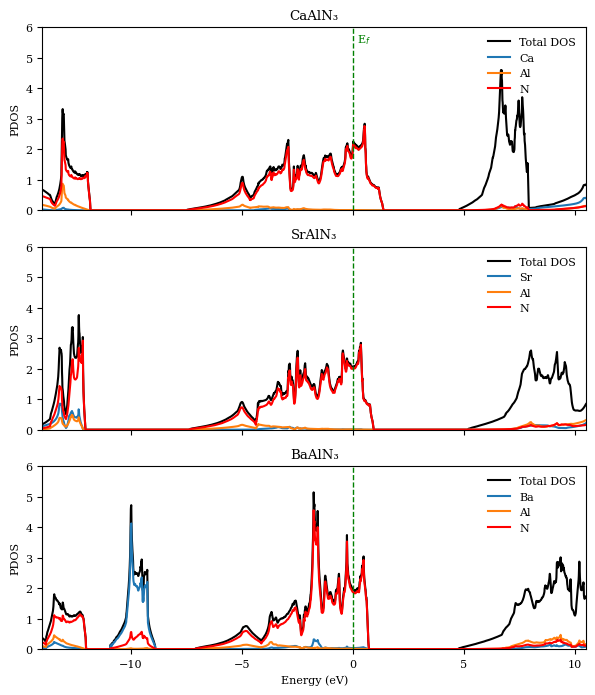

In [17]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

def r_dos(name):
    ener, dos = np.loadtxt(name, usecols=(0, 1), unpack=True)
    return ener, dos

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 7), sharex=True)

# === CaAlN3 ===
efermi = 8.3261

ener, dos = r_dos('/content/CaAlN3.pdos.dat.pdos_tot')
ener1, p1Ca1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#1(s)')
_,     p1Ca2s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#3(s)')
_,     p1Ca2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#2(p)')
_,     p2Al1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)')
_,     p2Al2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')
_,     p3N1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
_,     p3N2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')
_,     p4N1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
_,     p4N2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')
_,     p5N1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
_,     p5N2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')

pCa = p1Ca1s + p1Ca2s + p1Ca2p
pAl = p2Al1s + p2Al2p
pN = p3N1s + p3N2p + p4N1s + p4N2p + p5N1s + p5N2p

axs[0].plot(ener - efermi, dos, 'k', label='Total DOS')
axs[0].plot(ener1 - efermi, pCa, label='Ca')
axs[0].plot(ener1 - efermi, pAl, label='Al')
axs[0].plot(ener1 - efermi, pN, color = "red", label='N')
axs[0].axvline(0, color='g', linestyle='--', linewidth=1)
axs[0].text(0.2, 5.5, 'E$_f$', color='g', fontsize=8)
axs[0].set_ylabel('PDOS')
axs[0].set_ylim(0, 6)
axs[0].set_xlim(-14, 10.5)
axs[0].legend(frameon=False, loc='upper right')
axs[0].set_title('CaAlN₃')

# === SrAlN3 ===
efermi = 8.7975

ener, dos = r_dos('/content/SrAlN3.pdos.dat.pdos_tot')
ener1, p1Sr1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#1(Sr)_wfc#1(s)')
_,     p1Sr2s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#1(Sr)_wfc#3(s)')
_,     p1Sr2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#1(Sr)_wfc#2(p)')
_,     p2Al1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)')
_,     p2Al2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')
_,     p3N1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
_,     p3N2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')
_,     p4N1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
_,     p4N2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')
_,     p5N1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
_,     p5N2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')

pSr = p1Sr1s + p1Sr2s + p1Sr2p
pAl = p2Al1s + p2Al2p
pN = p3N1s + p3N2p + p4N1s + p4N2p + p5N1s + p5N2p

axs[1].plot(ener - efermi, dos, 'k', label='Total DOS')
axs[1].plot(ener1 - efermi, pSr, label='Sr')
axs[1].plot(ener1 - efermi, pAl, label='Al')
axs[1].plot(ener1 - efermi, pN, color = "red", label='N')
axs[1].axvline(0, color='g', linestyle='--', linewidth=1)
axs[1].set_ylabel('PDOS')
axs[1].set_ylim(0, 6)
axs[1].legend(frameon=False, loc='upper right')
axs[1].set_title('SrAlN₃')

# === BaAlN3 ===
efermi = 9.3620

ener, dos = r_dos('/content/BaAlN3.pdos.dat.pdos_tot')
ener1, p1Ba1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#1(Ba)_wfc#1(s)')
_,     p1Ba2s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#1(Ba)_wfc#3(s)')
_,     p1Ba2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#1(Ba)_wfc#2(p)')
_,     p2Al1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)')
_,     p2Al2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')
_,     p3N1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
_,     p3N2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')
_,     p4N1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
_,     p4N2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')
_,     p5N1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
_,     p5N2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')

pBa = p1Ba1s + p1Ba2s + p1Ba2p
pAl = p2Al1s + p2Al2p
pN = p3N1s + p3N2p + p4N1s + p4N2p + p5N1s + p5N2p

axs[2].plot(ener - efermi, dos, 'k', label='Total DOS')
axs[2].plot(ener1 - efermi, pBa, label='Ba')
axs[2].plot(ener1 - efermi, pAl, label='Al')
axs[2].plot(ener1 - efermi, pN, color = "red", label='N')
axs[2].axvline(0, color='g', linestyle='--', linewidth=1)
axs[2].set_ylabel('PDOS')
axs[2].set_xlabel('Energy (eV)')
axs[2].set_ylim(0, 6)
axs[2].legend(frameon=False, loc='upper right')
axs[2].set_title('BaAlN₃')

plt.tight_layout()
# plt.savefig('Stacked-ar-PDOS.png', dpi=300)
plt.show()

ORBITAL-RESOLVED PDOS

The orbital-resolved PDOS shows how different orbitals within the material contribute to the total DOS. The files needed here are the same ones you used for plotting the atom-resolved PDOS. The only difference between the two is how the code processes the data in the same files. You can run the code in the next cell to create the orbital-resolved PDOS plots.

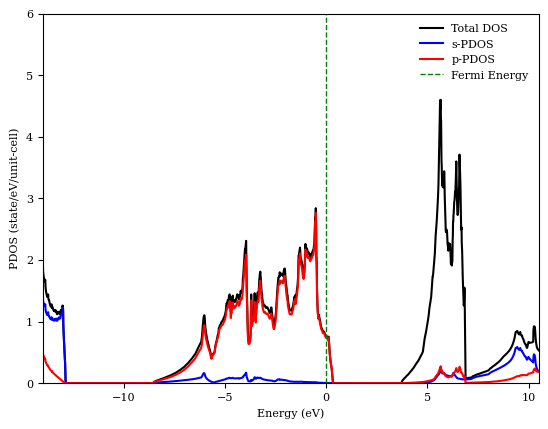

In [18]:
efermi = 9.3620
# Define the function to read the data file
def r_dos(name):
  ener, dos = np.loadtxt(name, usecols =(0,1),unpack=True)
  return ener, dos

# Read the total PDOS of ABX₃
ener, dos = r_dos('/content/CaAlN3.pdos.dat.pdos_tot') # change to appropriate file name

# Read the PDOS of A atom number 1
ener1, p1A1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#1(s)') # change to appropriate file name; you can rename the variable "p1A1s" to reflect the name of the specific atom
_,     p1A2s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#3(s)') # for example, you can write "p1Ba1s" instead of "p1A1s", if your material is BaAlN₃; only change the "A" part
_,     p1A2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#2(p)')

# Read the PDOS of B atom number 2
ener2, p2B1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)') # refer to the instructions above
_,     p2B2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')

# Read the PDOS of X atoms 3, 4, and 5
ener3, p3X1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
_,     p3X2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')

ener4, p4X1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
_,     p4X2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')

ener5, p5X1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
_,     p5X2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')
# feel free to add or subtract code lines depending on your needs

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8
# Create figure object
plt.figure ()
# Plot the DOS
plt.plot(ener-efermi, dos, c='k', label='Total DOS')
# Plot the PDOS of s-orbital
plt.plot(ener1-efermi, p1A1s+p1A2s+p2B1s+p3X1s+p4X1s+p4X1s, c='b', label='s-PDOS')
# Plot the PDOS of p-orbital
plt.plot(ener2-efermi, p1A2p+p2B2p+p3X2p+p4X2p+p4X2p, c='r', label='p-PDOS')
# Add the x and y-axis labels
plt.xlabel('Energy (eV)')
plt.ylabel('PDOS (state/eV/unit-cell)')
# Set the axis limits
plt.axvline(x=0, color='g', linestyle='--', linewidth=1, label='Fermi Energy')
plt.xlim(-14, 10.5)
plt.ylim(0, 6)
# Add a legend
plt.legend(frameon=False)
# Save the figure
plt.savefig('or-pdos.png', dpi=300)
# Show the figure
plt.show ()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

Alternatively, for purposes such as preparing a manuscript, it is often preferable to present the results in a single combined plot. If you prefer this style, you may use the following code. If not, you can stick with the separate images you have previously generated. Rename the material names, file paths, and variable labels to match the convention we used earlier. You may also add or remove code lines depending on the number of atoms or orbitals in your system.

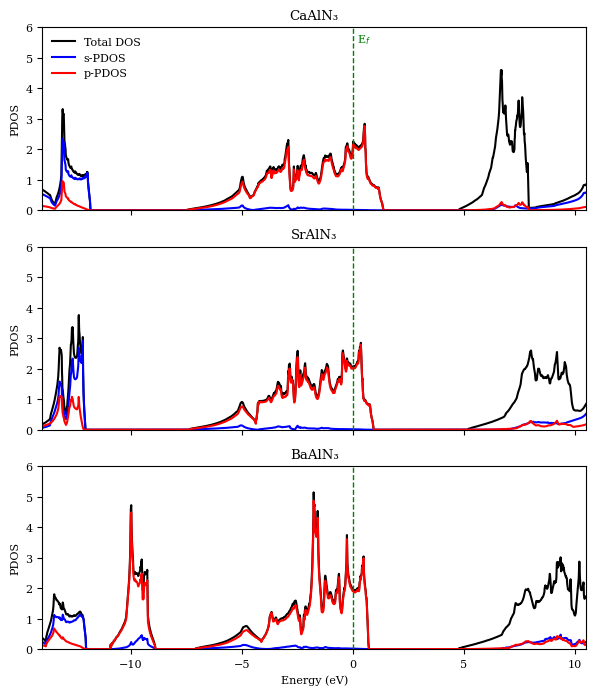

In [19]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

# Function to read data
def r_dos(name):
    ener, dos = np.loadtxt(name, usecols=(0, 1), unpack=True)
    return ener, dos

# Create a figure with 3 vertical subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 7), sharex=True)

# ================== CaAlN3 ==================
efermi = 8.3261
ener, dos = r_dos('/content/CaAlN3.pdos.dat.pdos_tot')
ener1, p1Ba1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#1(s)')
ener1, p1Ba2s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#3(s)')
ener1, p1Ba2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#1(Ca)_wfc#2(p)')
ener2, p2Al1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)')
ener2, p2Al2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')
ener3, p3N1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
ener3, p3N2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')
ener4, p4N1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
ener4, p4N2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')
ener4, p5N1s = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
ener4, p5N2p = r_dos('/content/CaAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')

axs[0].plot(ener - efermi, dos, 'k', label='Total DOS')
axs[0].plot(ener1 - efermi, p1Ba1s + p1Ba2s + p2Al1s + p3N1s + p4N1s + p5N1s, 'b', label='s-PDOS')
axs[0].plot(ener2 - efermi, p1Ba2p + p2Al2p + p3N2p + p4N2p + p5N2p, 'r', label='p-PDOS')
axs[0].axvline(0, color='g', linestyle='--', linewidth=1)
axs[0].text(0.2, 5.5, 'E$_f$', color='g', fontsize=8)
axs[0].set_ylabel('PDOS')
axs[0].set_ylim(0, 6)
axs[0].set_xlim(-14, 10.5)
axs[0].set_title('CaAlN₃')
axs[0].legend(frameon=False)

# ================== SrAlN3 ==================
efermi = 8.7975
ener, dos = r_dos('/content/SrAlN3.pdos.dat.pdos_tot')
ener1, p1Ba1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#1(Sr)_wfc#1(s)')
ener1, p1Ba2s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#1(Sr)_wfc#3(s)')
ener1, p1Ba2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#1(Sr)_wfc#2(p)')
ener2, p2Al1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)')
ener2, p2Al2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')
ener3, p3N1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
ener3, p3N2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')
ener4, p4N1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
ener4, p4N2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')
ener4, p5N1s = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
ener4, p5N2p = r_dos('/content/SrAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')

axs[1].plot(ener - efermi, dos, 'k')
axs[1].plot(ener1 - efermi, p1Ba1s + p1Ba2s + p2Al1s + p3N1s + p4N1s + p5N1s, 'b')
axs[1].plot(ener2 - efermi, p1Ba2p + p2Al2p + p3N2p + p4N2p + p5N2p, 'r')
axs[1].axvline(0, color='g', linestyle='--', linewidth=1)
axs[1].set_ylabel('PDOS')
axs[1].set_ylim(0, 6)
axs[1].set_title('SrAlN₃')

# ================== BaAlN3 ==================
efermi = 9.3620
ener, dos = r_dos('/content/BaAlN3.pdos.dat.pdos_tot')
ener1, p1Ba1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#1(Ba)_wfc#1(s)')
ener1, p1Ba2s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#1(Ba)_wfc#3(s)')
ener1, p1Ba2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#1(Ba)_wfc#2(p)')
ener2, p2Al1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#1(s)')
ener2, p2Al2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#2(Al)_wfc#2(p)')
ener3, p3N1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#3(N)_wfc#1(s)')
ener3, p3N2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#3(N)_wfc#2(p)')
ener4, p4N1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#4(N)_wfc#1(s)')
ener4, p4N2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#4(N)_wfc#2(p)')
ener4, p5N1s = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#5(N)_wfc#1(s)')
ener4, p5N2p = r_dos('/content/BaAlN3.pdos.dat.pdos_atm#5(N)_wfc#2(p)')

axs[2].plot(ener - efermi, dos, 'k')
axs[2].plot(ener1 - efermi, p1Ba1s + p1Ba2s + p2Al1s + p3N1s + p4N1s + p5N1s, 'b')
axs[2].plot(ener2 - efermi, p1Ba2p + p2Al2p + p3N2p + p4N2p + p5N2p, 'r')
axs[2].axvline(0, color='g', linestyle='--', linewidth=1)
axs[2].set_ylabel('PDOS')
axs[2].set_ylim(0, 6)
axs[2].set_title('BaAlN₃')
axs[2].set_xlabel('Energy (eV)')

# Final layout
plt.tight_layout()
# plt.savefig('stacked-or-PDOS.png', dpi=300)
plt.show()

III.d. COMBINED BAND STRUCTURE AND DENSITY OF STATES

If you would like to plot the band structure and density of states side by side, you can certainly do so. This layout is often preferred, as it allows for a direct comparison between the DOS and the corresponding band structure. For this purpose, use the .gnu file containing the non–spin-polarized band structure together with the .dat file containing the DOS data.

<>:37: SyntaxWarning: invalid escape sequence '\G'
<>:37: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-1826394185.py:37: SyntaxWarning: invalid escape sequence '\G'
  ax_band.set_xticklabels(['X', 'R', 'M', '$\Gamma$', 'R'])
/tmp/ipython-input-1826394185.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


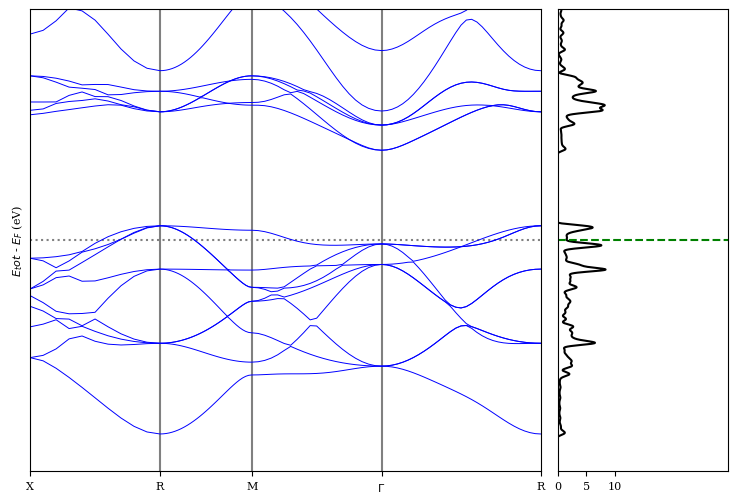

In [20]:
# Band Structure Data
efermi_band = 10.0705
band_data = np.loadtxt('/content/gr.bands.CaAlN3.gnu')
k = np.unique(band_data[:, 0])
bands = np.reshape(band_data[:, 1], (-1, len(k)))

X = k[0]; R1 = k[10]; M = k[40]; gG = k[60]; R2 = k[90]

# DOS Data
efermi_dos = 10.0705
ener, dos, idos = np.loadtxt('/content/CaAlN3.dos.dat', unpack=True)
ener_shifted = ener - efermi_dos  # Align to same Fermi level as band plot

# Plot Setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

fig = plt.figure(figsize=(9, 6))
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.05)

# Band Structure Plot
ax_band = fig.add_subplot(gs[0])
ax_band.axhline(0, c='gray', ls=':')
ax_band.axvline(R1, c='gray')
ax_band.axvline(M, c='gray')
ax_band.axvline(gG, c='gray')

for band in range(len(bands)):
    ax_band.plot(k, bands[band, :] - efermi_band, c='b', lw=0.7)

ax_band.set_ylabel('$E_tot$ - $E_F$ (eV)')
ax_band.set_xlim(X, R2)
ax_band.set_ylim(-10, 10)
ax_band.set_yticks(np.arange(-10, 11, 5))
ax_band.set_xticks([X, R1, M, gG, R2])
ax_band.set_xticklabels(['X', 'R', 'M', '$\Gamma$', 'R'])

# DOS Plot (sideways)
ax_dos = fig.add_subplot(gs[1], sharey=ax_band)
ax_dos.plot(dos, ener_shifted, c='k')
ax_dos.axhline(0, color='g', linestyle='--', label='Fermi Energy')

ax_dos.set_xlim(0, max(dos) * 1.1)
ax_dos.set_ylim(-10, 10)
ax_dos.set_xticks([0, 5, 10])
ax_dos.set_yticks([])  # <-- This line removes the right-side ticks
ax_dos.set_yticklabels([])
ax_dos.tick_params(axis='y', which='both', left=False, right=False)

# Final Layout
plt.tight_layout()
# plt.savefig('band-dos-combined.png', dpi=300)
plt.show()

As before, if you need to process multiple datasets, create a new code cell and reuse the script.

Alternatively, for purposes such as preparing a manuscript, it is often preferable to present the results in a single combined plot. If you prefer this style, you may use the following code. If not, you can stick with the separate images you have previously generated.

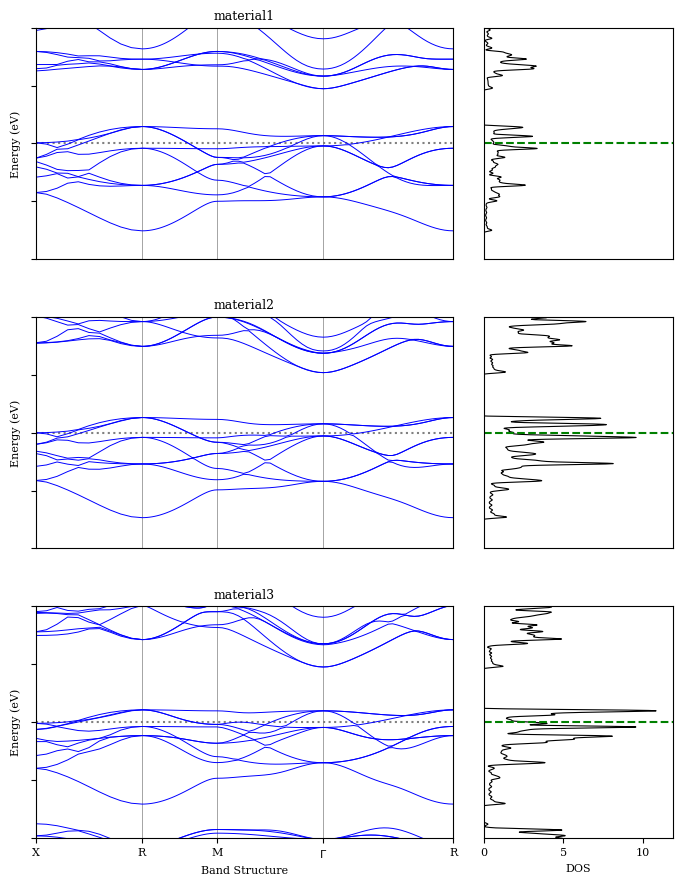

In [21]:
# Compounds in desired order
compounds = [
    {'name': 'material1', 'band_file': '/content/gr.bands.CaAlN3.gnu', 'dos_file': '/content/CaAlN3.dos.dat', 'efermi': 9.2385}, # write their appropriate Fermi energies
    {'name': 'material2', 'band_file': '/content/gr.bands.SrAlN3.gnu', 'dos_file': '/content/SrAlN3.dos.dat', 'efermi': 9.5632}, # feel free to add or subtract code lines for any number of your material
    {'name': 'material3', 'band_file': '/content/gr.bands.BaAlN3.gnu', 'dos_file': '/content/BaAlN3.dos.dat', 'efermi': 10.0705},
]

# Plot style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 8

# Create figure and gridspec
fig = plt.figure(figsize=(7.5, 9))
gs = GridSpec(len(compounds), 2, width_ratios=[2.2, 1], hspace=0.25, wspace=0.1)

for i, comp in enumerate(compounds):
    # Load band data
    band_data = np.loadtxt(comp['band_file'])
    k = np.unique(band_data[:, 0])
    bands = np.reshape(band_data[:, 1], (-1, len(k)))

    # High symmetry points
    X = k[0]
    R1 = k[min(10, len(k)-1)]
    M = k[min(40, len(k)-1)]
    gG = k[min(60, len(k)-1)]
    R2 = k[min(90, len(k)-1)]

    # Load DOS
    ener, dos, _ = np.loadtxt(comp['dos_file'], unpack=True)
    ener_shifted = ener - comp['efermi']

    # Band structure plot
    ax_band = fig.add_subplot(gs[i, 0])
    ax_band.axhline(0, color='gray', linestyle=':')
    for x in [R1, M, gG]:
        ax_band.axvline(x, color='gray', linewidth=0.5)

    for band in bands:
        ax_band.plot(k, band - comp['efermi'], color='blue', linewidth=0.7)

    ax_band.set_yticks(np.arange(-10, 11, 5))
    ax_band.set_xlim(X, R2)
    ax_band.set_ylim(-10, 10)
    ax_band.set_ylabel("Energy (eV)")
    ax_band.set_xticks([X, R1, M, gG, R2])
    ax_band.set_xticklabels(['X', 'R', 'M', r'$\Gamma$', 'R'])

    if i != len(compounds) - 1:
        ax_band.set_xticklabels([])
        ax_band.tick_params(axis='x', bottom=False)

    ax_band.set_title(comp['name'], fontsize=9)

    # DOS plot
    ax_dos = fig.add_subplot(gs[i, 1], sharey=ax_band)
    ax_dos.plot(dos, ener_shifted, color='black', linewidth=0.8)
    ax_dos.axhline(0, color='green', linestyle='--')

    ax_dos.set_xlim(0, max(dos) * 1.1)
    ax_dos.set_xticks([0, 5, 10])
    ax_dos.set_yticks(np.arange(-10, 11, 5))
    ax_dos.set_yticklabels([])  # No y-ticks on DOS
    ax_dos.tick_params(axis='y', left=False)

    if i != len(compounds) - 1:
        ax_dos.set_xticklabels([])
        ax_dos.tick_params(axis='x', bottom=False)
    else:
        ax_dos.set_xlabel("DOS")

# Add bottom label for k-point axis
fig.get_axes()[-2].set_xlabel("Band Structure")

# Adjust layout manually
fig.subplots_adjust(left=0.1, right=0.95, top=0.96, bottom=0.06, hspace=0.3, wspace=0.1)
# plt.savefig('band-dos-combined-stacked.png', dpi=300)
plt.show()

Congratulations! You have now successfully processed and visualized the electronic properties of your material.

### IV. MECHANICAL PROPERTIES

Finally, to assess a material’s mechanical stability, we compute its elastic tensors, which allows us to determine various mechanical properties. Many of these properties—such as Young’s modulus, shear modulus, and Poisson’s ratio—are direction-dependent, meaning a material may behave differently along different crystallographic directions. Because of this anisotropy, it is useful to visualize these properties over all directions. Polar or spherical plots are commonly used for this purpose, as they show how each property varies with direction (expressed in degrees or radians), making it easier to compare their behavior simultaneously.

##### IV.a. COMBINED POLAR PLOTS

From your elastic.out file, manually input your elastic tensors in the code block below. Make sure that the units are in GPa.

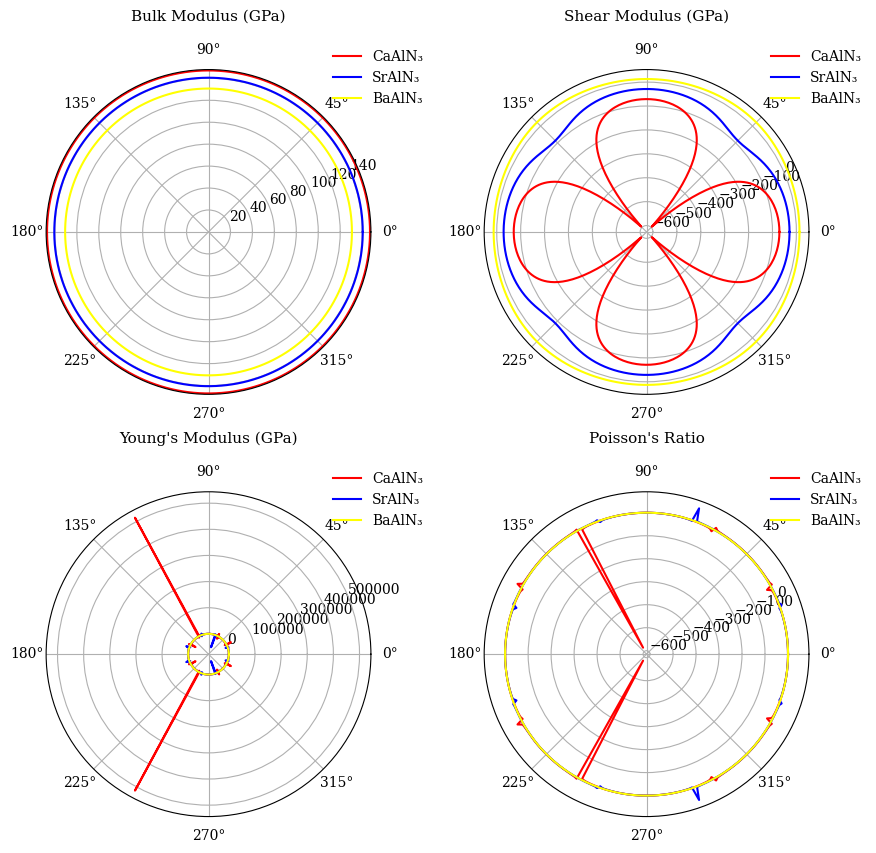

In [26]:
compounds = { # Elastic constants in GPa for each compound; input manually
"CaAlN₃": {"C11": 271.43759, "C12": 85.05095, "C44": -70.99232}, # change the material name and values accordingly
"SrAlN₃": {"C11": 253.89064, "C12": 83.91009, "C44": -28.73079},
"BaAlN₃": {"C11": 218.54063, "C12": 86.76863, "C44": 13.00553} }

theta = np.linspace(0, 2*np.pi, 360)

def get_moduli(C11, C12, C44):
    if C44 == 0:
        C44 = 1e-6  # avoid div by zero
    S11 = (C11 + C12) / ((C11 - C12)*(C11 + 2*C12))
    S12 = -C12 / ((C11 - C12)*(C11 + 2*C12))
    S44 = 1 / C44

    cos2 = np.cos(theta)**2
    sin2 = np.sin(theta)**2

    B = np.full_like(theta, (C11 + 2*C12)/3)
    E = 1 / (S11 - 2*(S11 - S12 - 0.5*S44)*cos2*sin2)
    G = 1 / (4*(S11 - S12 - 0.5*S44)*cos2*sin2 + S44)
    ν = -E * (S12 + (S11 - S12 - 0.5*S44)*cos2*sin2)

    return B, G, E, ν

# Plotting setup
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 10

fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(10, 9))

colors = {'BaAlN₃': 'yellow', 'SrAlN₃': 'blue', 'CaAlN₃': 'red'}

for label, const in compounds.items():
    C11, C12, C44 = const["C11"], const["C12"], const["C44"]
    B, G, E, ν = get_moduli(C11, C12, C44)
    axs[0, 0].plot(theta, B, label=label, color=colors[label])
    axs[0, 1].plot(theta, G, label=label, color=colors[label])
    axs[1, 0].plot(theta, E, label=label, color=colors[label])
    axs[1, 1].plot(theta, ν, label=label, color=colors[label])

# Manually add titles *above* the 90° tick in each subplot
axs[0, 0].text(0.5, 1.15, "Bulk Modulus (GPa)", transform=axs[0, 0].transAxes, ha='center', fontsize=11)
axs[0, 1].text(0.5, 1.15, "Shear Modulus (GPa)", transform=axs[0, 1].transAxes, ha='center', fontsize=11)
axs[1, 0].text(0.5, 1.15, "Young's Modulus (GPa)", transform=axs[1, 0].transAxes, ha='center', fontsize=11)
axs[1, 1].text(0.5, 1.15, "Poisson's Ratio", transform=axs[1, 1].transAxes, ha='center', fontsize=11)

# Add legends
for ax in axs.flat:
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), frameon=False)

# Overall title and layout
plt.subplots_adjust(top=0.88, bottom=0.05, hspace=0.3, wspace=0.3)
# plt.savefig('elastic-anisotropy.png', dpi=300)
plt.show()

In rare cases—such as what happened in my thesis—the mechanical properties cannot be reliably analyzed because the elastic tensor contains anomalous or non-physical values. This results in highly distorted and unusable directional plots. Under normal, physically valid elastic tensors, the directional mechanical property plots should appear as either perfect circles (for isotropic materials) or as multi-lobed “flower-like’’ shapes (for anisotropic materials). A circular plot indicates that the property has the same value in all directions. In contrast, anisotropic plots show lobes where the radius is larger, representing directions in which the property is stronger, and smaller radii in the “valleys’’ or indentations, representing directions where the property is weaker.

##### IV.b. INDIVIDUAL PLOTS

As mentioned earlier, some plots may appear distorted due to non-physical or invalid mechanical property values. To examine how each property behaves on its own—without being affected by other parameters, especially when some of them are anomalous—you can use the code block below to visualize each property individually.

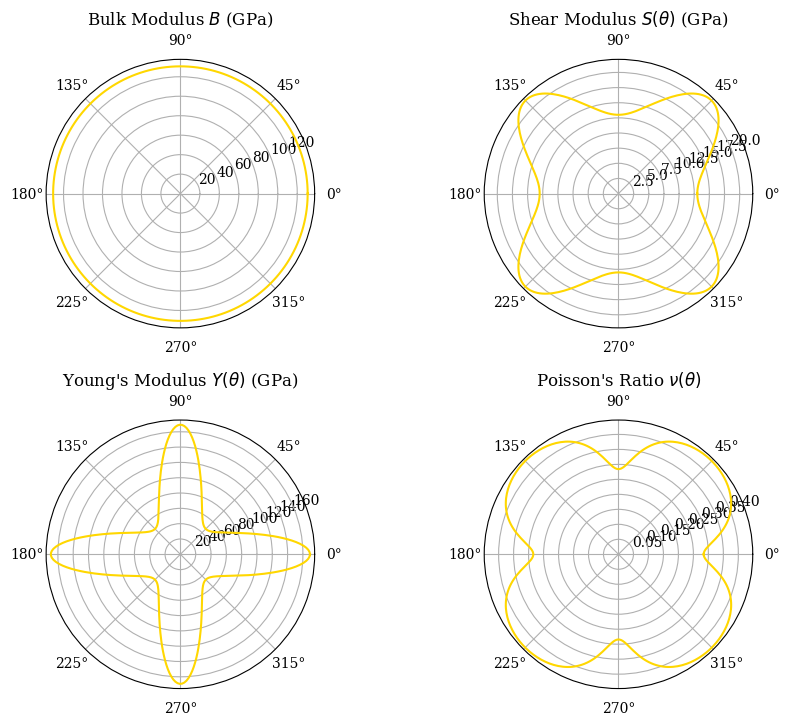

In [27]:
BaAlN3 = { # change to your material name
    "C11": 2185.40632, "C12":  867.68625, "C44":  130.05531, # input your elastic tensors
    "S11":    0.59094, "S12":   -0.16795, "S44":   7.68904
}

# Unit conversions: Cij (kbar→GPa), Sij (1/Mbar→1/GPa)
for key in ["C11", "C12", "C44"]:
    BaAlN3[key] *= 0.1
for key in ["S11", "S12", "S44"]:
    BaAlN3[key] *= 0.01

# Angles for plotting
theta = np.linspace(0, 2*np.pi, 360)
cos2, sin2 = np.cos(theta)**2, np.sin(theta)**2

# Function to compute directional moduli
def get_moduli(C11, C12, C44, S11, S12, S44):
    B = np.full_like(theta, (C11 + 2*C12) / 3.0)

    denom_E = S11 - 2*(S11 - S12 - 0.5*S44) * cos2 * sin2
    denom_E = np.where(denom_E <= 0, np.nan, denom_E)
    E = 1.0 / denom_E

    denom_G = 4*(S11 - S12 - 0.5*S44) * cos2 * sin2 + S44
    denom_G = np.where(denom_G <= 0, np.nan, denom_G)
    G = 1.0 / denom_G

    ν = -E * (S12 + (S11 - S12 - 0.5*S44) * cos2 * sin2)

    return B, G, E, ν

# Plotting
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'DejaVu Serif'
})

fig, axs = plt.subplots(2, 2,
                        subplot_kw={'projection': 'polar'},
                        figsize=(10, 8))

color = 'gold'

B, G, E, ν = get_moduli(
    BaAlN3["C11"], BaAlN3["C12"], BaAlN3["C44"],
    BaAlN3["S11"], BaAlN3["S12"], BaAlN3["S44"]
)

axs[0, 0].plot(theta, B, label='BaAlN₃', color=color)
axs[0, 1].plot(theta, G, label='BaAlN₃', color=color)
axs[1, 0].plot(theta, E, label='BaAlN₃', color=color)
axs[1, 1].plot(theta, ν, label='BaAlN₃', color=color)

axs[0, 0].set_title("Bulk Modulus $B$ (GPa)", pad=25)
axs[0, 1].set_title("Shear Modulus $S(\\theta)$ (GPa)", pad=25)
axs[1, 0].set_title("Young's Modulus $Y(\\theta)$ (GPa)", pad=25)
axs[1, 1].set_title("Poisson's Ratio $\\nu(\\theta)$", pad=25)

for ax in axs.flat:
    ax.legend().remove()

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
# plt.savefig("mechanical-polar-plot", dpi=300)
plt.show()

Fortunately, the plots generated here are physically consistent, allowing us to observe properties that appear either as perfect circles or as lobed patterns, depending on the degree of anisotropy.

Congratulations! You have now succesfully processed and visualized your mechanical properties!

If some properties you need are not included in this notebook, you are encouraged to extend it by building your own code or consulting other resources. For beginners in Python, it is perfectly fine to seek help—whether from peers or AI tools—but always make sure that the code you create or adapt produces the correct plots. As a good practice, test your workflow first on materials with available reference plots (for example, you may ask the notebook owner for his internship reports where various materials were studied and benchmarked). Best of luck on your DFT journey!

*Jericho Ross R. Operio, BS Chemistry Class of 2025*

https://www.facebook.com/jrroperio

https://www.linkedin.com/in/jericho-ross-o-74a850344/

https://github.com/operiojrr